# Q-network in DQ-Learning

In [1]:
"""
Description:

This script allows to plot the structure of Q-network in DQL algorithm.

"""

'\nDescription:\n\nThis script allows to plot the structure of Q-network in DQL algorithm.\n\n'

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

import sklearn.preprocessing
from scipy.signal import periodogram

TRAIN_PATH = '/mnt/BTE2b/DBS/2020/v2/Trainings/2020-03-13/'
VALID_PATH = '/mnt/BTE2b/DBS/2020/v2/Results/Validation/'
STEP = 149500

plt.rcParams.update({'font.size':22})

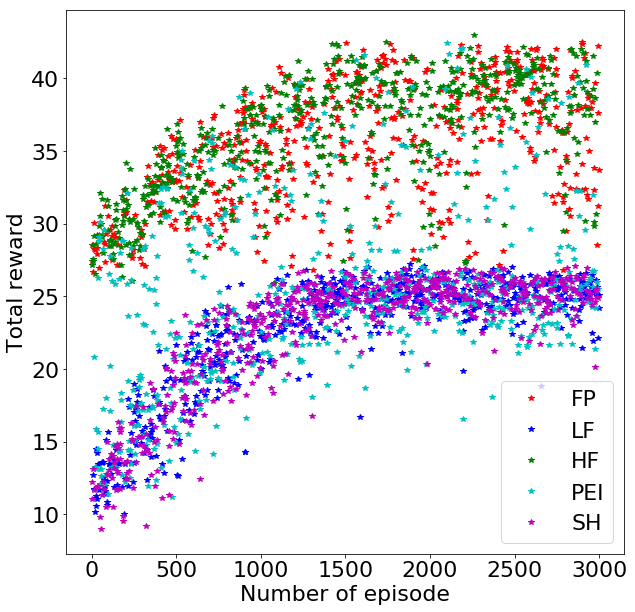

In [4]:
# Total reward vs Episode. 

reward_episode = np.loadtxt(TRAIN_PATH + 'Rewards_Episode.dat')

# Sin clasificación de los estados ==================================
#plt.figure(figsize=(10,10))
#plt.plot(reward_episode[:,0], reward_episode[:,3],'b*')
#plt.xlabel('Number of episode')
#plt.ylabel('Total reward')
#plt.show()

# Clasificando los estados ==========================================

num_state = 5
data_rew = [[]] * num_state
color_state = ['r*', 'b*', 'g*' , 'c*' ,'m*'] 
legend_state = ['FP', 'LF', 'HF' , 'PEI' ,'SH'] 

for i in range(5):
    data_rew[i] = reward_episode[reward_episode[:,1] == i,:] 


plt.figure(figsize=(10,10))

for i in range(5):
    plt.plot(data_rew[i][:,0],data_rew[i][:,4],color_state[i])

plt.xlabel('Number of episode')
plt.ylabel('Total reward')
plt.legend(legend_state)
plt.show()

#max_r2 = np.amax(rew_s2[:,2])
#index_maxr2 = np.where(rew_s2[:,2] == max_r2)
#ep_maxr2 = rew_s2[index_maxr2,0]
#print(ep_maxr2)

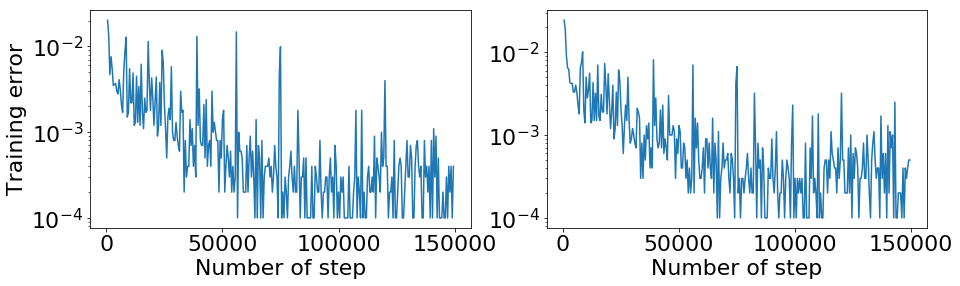

In [5]:
# Error Q-Network vs epoch.
q_error = np.loadtxt(TRAIN_PATH + 'Training.dat')

FIG1, AXS1 = plt.subplots(1,2)

for j in np.arange(2):
    AXS1[j].plot(q_error[:,0],q_error[:,j+3])
    AXS1[j].set_yscale('log')
    AXS1[j].set_xlabel('Number of step')
    
AXS1[0].set_ylabel('Training error')    
FIG1.set_size_inches(15,4)
plt.show()

In [6]:
# Load data of weight and bias
weight = []
weight.append(np.loadtxt(TRAIN_PATH + 'Weight_0_Step_'+ str(STEP) + '.dat'))
weight.append(np.loadtxt(TRAIN_PATH + 'Weight_2_Step_'+ str(STEP) + '.dat'))
#weight.append(np.loadtxt(LOCAL_PATH + 'Weight_4_Step_'+ str(STEP) + '.dat'))

bias = []
bias.append(np.loadtxt(TRAIN_PATH + 'Weight_1_Step_'+ str(STEP) + '.dat'))
bias.append(np.loadtxt(TRAIN_PATH + 'Weight_3_Step_'+ str(STEP) + '.dat'))
#bias.append(np.loadtxt(LOCAL_PATH + 'Weight_5_Step_'+ str(STEP) + '.dat'))

# Initial condition of weight
initial_w = []
for i in np.arange(2):
#for i in np.arange(3):
    sigma = np.sqrt(2/(weight[i].shape[0]))
    initial_w.append(np.random.normal(0,sigma,(weight[i].shape[0],weight[i].shape[1])))

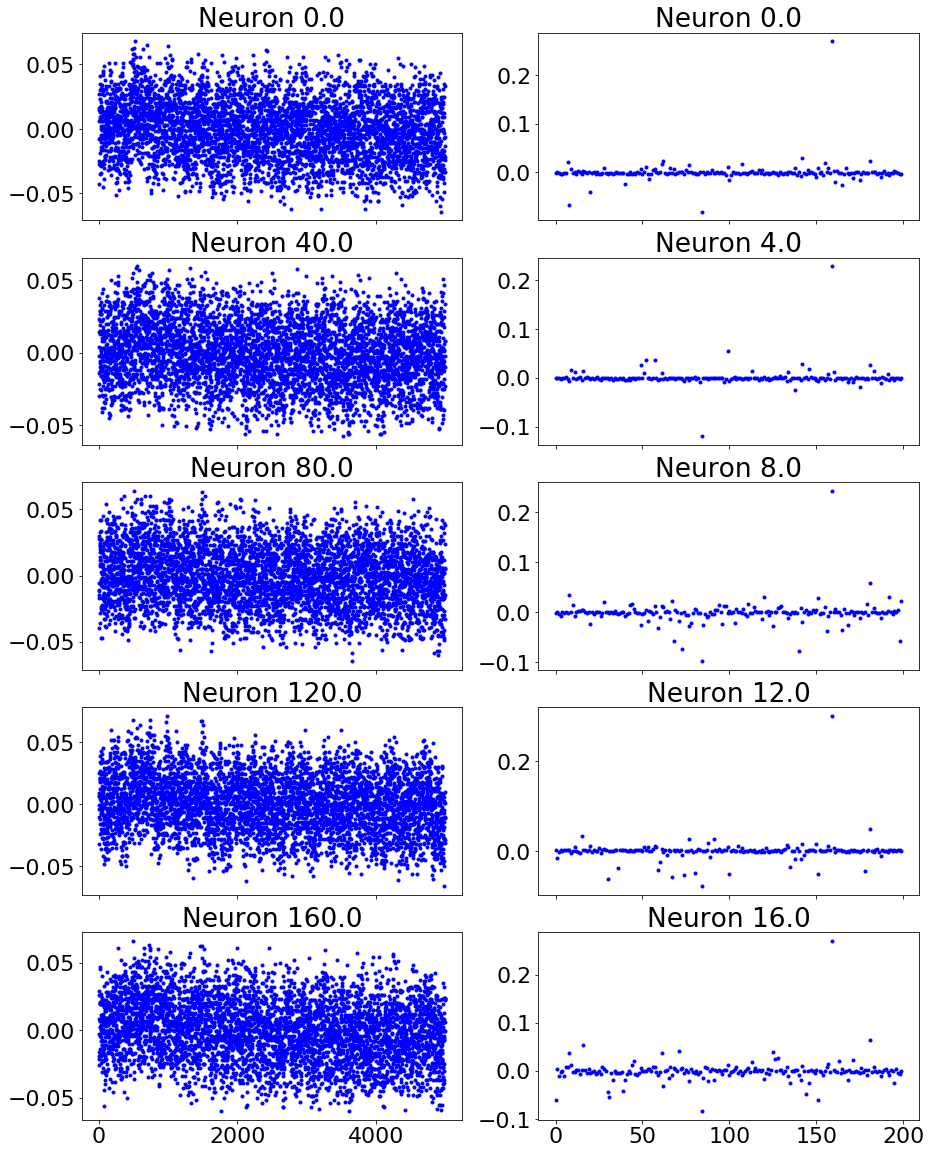

In [7]:
# Plot weight of layers in Q-network.
FIG2, AXS2 = plt.subplots(5,2)
#FIG1, AXS1 = plt.subplots(5,3)

for j in np.arange(2):
#for j in np.arange(3):
    number_out = weight[j].shape[1]
    dnum_out = number_out/5
#5
    for i in np.arange(5):
            out_neuron = i * dnum_out
            #AXS2[i,j].plot(initial_w[j][:,i],'r.')
            AXS2[i,j].plot(weight[j][:,i],'b.')            
            AXS2[i,j].set_title('Neuron ' + repr(out_neuron))

    plt.setp([a.get_xticklabels() for a in AXS2[:-1,j]],visible=False)

FIG2.set_size_inches(15,20)
#FIG2.set_size_inches(15,50)
plt.show()

/home/dbs/.local/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/home/dbs/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


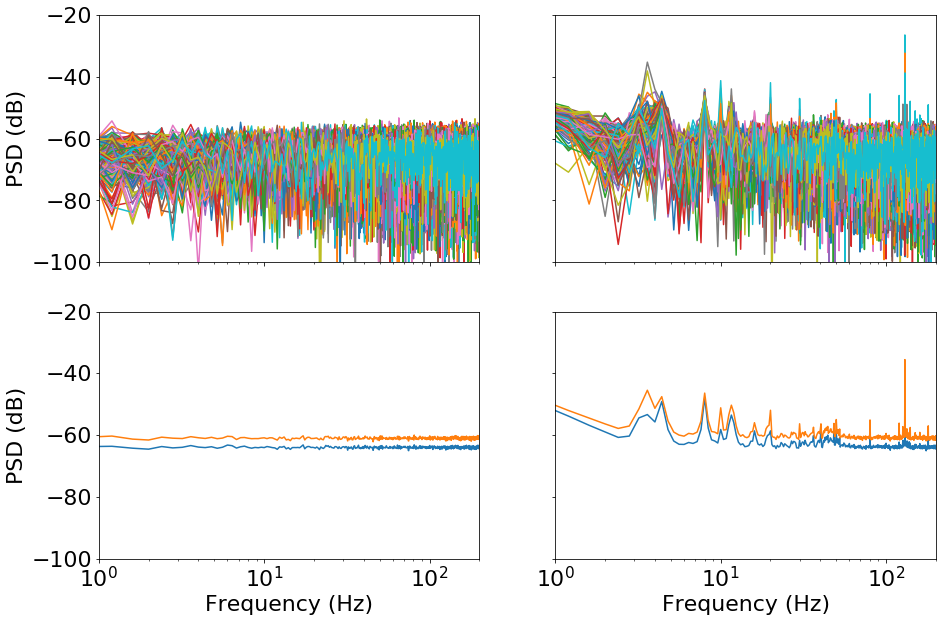

In [8]:
# Plot FIRST LAYER and PSD

# Si deseo graficar solo una neurona.
#NeuronPlot = 6
#LayerInitial = initial_w[0][:,NeuronPlot]
#LayerEnd = weight[0][:,NeuronPlot]

# Si deseo graficar la estadistica completa.
LayerInitial = initial_w[0]
LayerEnd = weight[0]

# Calculo del PSD antes y despues del entrenamiento.
fSta, PSDSta = periodogram(LayerInitial.T,2000)
fEnd, PSDEnd = periodogram(LayerEnd.T,2000)

# Estadistica sobre PSDs.
PSDStaMean = np.mean(PSDSta,axis=0)
PSDEndMean = np.mean(PSDEnd,axis=0)

PSDStaDes = np.std(PSDSta,axis=0)
PSDEndDes = np.std(PSDEnd,axis=0)

# Plot de una sola neurona
#plt.plot(fSta, 10*np.log10(PSDSta),'r-', fEnd, 10*np.log10(PSDEnd),'b-')            

# Plot de la estadistica completa.
FIG3, AXS3 = plt.subplots(2,2,sharey='row',sharex='col')
AXS3[0,0].plot(fSta, 10*np.log10(PSDSta.T))
AXS3[0,1].plot(fEnd, 10*np.log10(PSDEnd.T))
AXS3[1,0].plot(fEnd, 10*np.log10(PSDStaMean))
AXS3[1,1].plot(fEnd, 10*np.log10(PSDEndMean))
AXS3[1,0].plot(fEnd, 10*np.log10(PSDStaMean+PSDStaDes))
AXS3[1,1].plot(fEnd, 10*np.log10(PSDEndMean+PSDEndDes))

for j in np.arange(2):
    for i in np.arange(2):
        AXS3[i,j].set_xscale('log')
        AXS3[i,j].set_xlim(1,200)
        AXS3[i,j].set_ylim(-100,-20)

AXS3[0,0].set_ylabel('PSD (dB)')
AXS3[1,0].set_ylabel('PSD (dB)')
AXS3[1,0].set_xlabel('Frequency (Hz)')
AXS3[1,1].set_xlabel('Frequency (Hz)')

FIG3.set_size_inches(15,10)

plt.show()

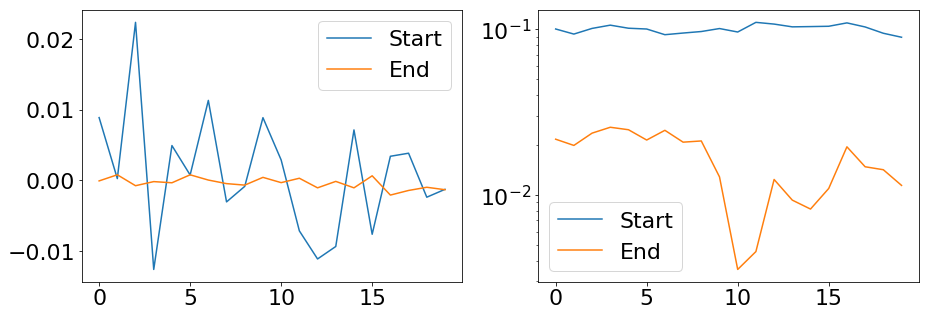

In [9]:
# Segunda capa.
# Average weigth + Std 
MeanWeightInitial = np.mean(initial_w[1],axis=0)
StdWeightInitial = np.std(initial_w[1],axis=0)

MeanWeightEnd = np.mean(weight[1],axis=0)
StdWeightEnd = np.std(weight[1],axis=0)

FIG4, AXS4 = plt.subplots(1,2)

AXS4[0].plot(MeanWeightInitial)
AXS4[0].plot(MeanWeightEnd)
AXS4[0].legend(['Start','End'])
AXS4[1].plot(StdWeightInitial)
AXS4[1].plot(StdWeightEnd)
AXS4[1].legend(['Start','End'])
AXS4[1].set_yscale('log')    

FIG4.set_size_inches(15,5)
plt.show()

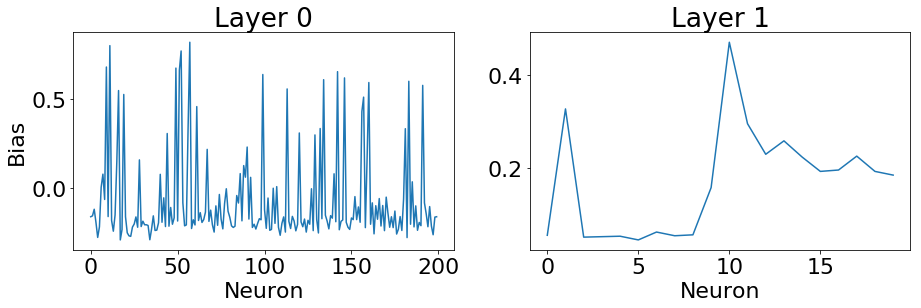

In [18]:
# Plot bias
#FIG3, AXS3 = plt.subplots(1,3)
FIG5, AXS5 = plt.subplots(1,2)

#for j in np.arange(3):
for j in np.arange(2):
    AXS5[j].plot(bias[j])
    AXS5[j].set_title('Layer ' + repr(j))
    AXS5[j].set_xlabel('Neuron')

AXS5[0].set_ylabel('Bias')
FIG5.set_size_inches(15,4)
plt.show()


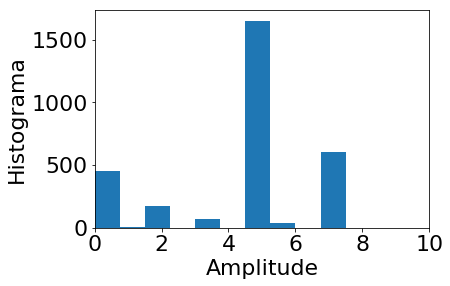

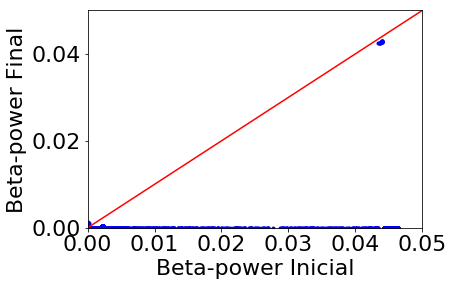

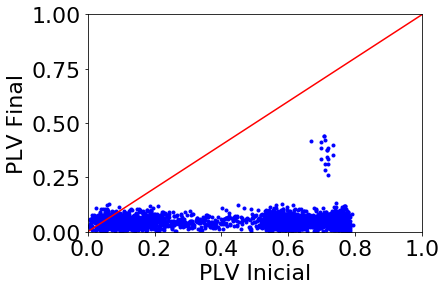

In [23]:
# Validations
validation_data = np.loadtxt(VALID_PATH + '2020-03-13.dat')
aux = np.linspace(0,1,100)
number_samples = np.shape(validation_data)[0]

# Plot of Amplitude distributions.
plt.hist(validation_data[:,2])
plt.xlim(0,10)
plt.xlabel('Amplitude')
plt.ylabel('Histograma')
plt.show()

# Plot Beta Initial vs Beta End.
plt.plot(validation_data[:,3],validation_data[:,4],'b.')
plt.plot(aux,aux,'-r')
plt.xlim(0,0.05)
plt.ylim(0,0.05)
plt.xlabel('Beta-power Inicial')
plt.ylabel('Beta-power Final')
plt.show()

# Plot PLV Initial vs Beta End.
plt.plot(validation_data[:,5],validation_data[:,6],'b.')
plt.plot(aux,aux,'-r')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('PLV Inicial')
plt.ylabel('PLV Final')
plt.show()

#prueba=sum(map(lambda i: validation_data[i,4] <= validation_data[i,3], range(number_samples)))
#print(prueba)

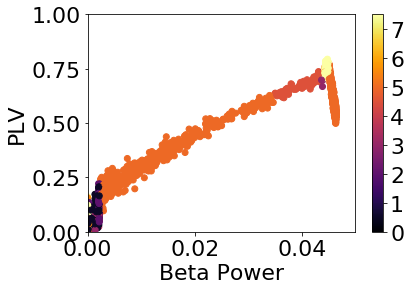

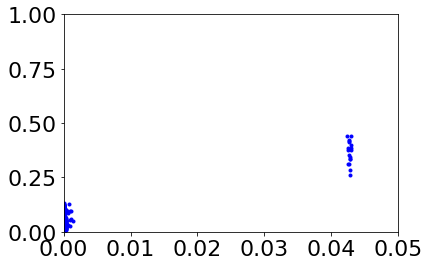

In [34]:
# A vs Beta/PLV 
#FIG6, AXS6 = plt.subplots(1,2)
#xlabel = ['Initial Beta Power', 'PLV']
#for j in np.arange(2):
#    AXS6[j].plot(validation_data[:,3+j*2],validation_data[:,2],'b.')
#    AXS6[j].set_xlabel(xlabel[j])
    
#AXS6[0].set_ylabel('Amplitude')    
#FIG6.set_size_inches(15,4)
#plt.show()
#p = ax.scatter(Data[:,0],Data[:,1],Amplitude,c=Reward,cmap=cmhot)


cmhot=plt.cm.get_cmap('inferno')
FIG6, AXS6 = plt.subplots(1,1)
p=AXS6.scatter(validation_data[:,3],validation_data[:,5],c=validation_data[:,2],cmap=cmhot)
AXS6.set_xlabel('Beta Power')
AXS6.set_ylabel('PLV')
AXS6.set_xlim(0,0.05)
AXS6.set_ylim(0,1)
FIG6.colorbar(p)
plt.show()

plt.plot(validation_data[:,4],validation_data[:,6],'b.')
plt.xlim(0,0.05)
plt.ylim(0,1)
plt.show()

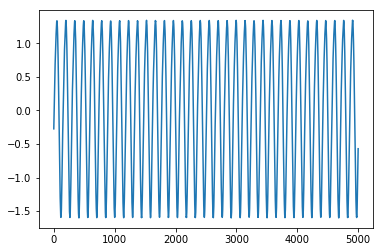

In [59]:
# Validation signals:
# List: (0.5,-0.5); (0.5,-3.5); (1,-1.5); (1,-3); (2.5,-1.5); (2.5,-2.5); (3.5,-0.5); (3.5,-3.5)

signal = np.loadtxt(VALID_PATH + '/ValidationSet/Signal_2.5_-1.5.dat')
signal_norm = sklearn.preprocessing.scale(signal)

plt.plot(signal_norm)
plt.show()


In [60]:
# Layer representations in the end of TRAINING.
i_layer2 = np.dot(weight[0].transpose(),signal_norm) + bias[0]
o_layer2 = np.maximum(i_layer2,0)

i_layer3 = np.dot(weight[1].transpose(),o_layer2) + bias[1]
o_layer3 = i_layer3
#o_layer3 = np.maximum(i_layer3,0)

#i_layer4 = np.dot(weight[2].transpose(),o_layer3) + bias[2]
#o_layer4 = i_layer4

output_end = [signal_norm,o_layer2,o_layer3]
#output_end = [signal_norm,o_layer2,o_layer3,o_layer4]

In [61]:
# Layer representations in the start of TRAINING.
i_layer2 = np.dot(initial_w[0].transpose(),signal_norm) + 0.1
o_layer2 = np.maximum(i_layer2,0)

i_layer3 = np.dot(initial_w[1].transpose(),o_layer2) + 0.1 
o_layer3 = i_layer3
#o_layer3 = np.maximum(i_layer3,0)

#i_layer4 = np.dot(initial_w[2].transpose(),o_layer3) + 0.1
#o_layer4 = i_layer4

output_start = [signal_norm,o_layer2,o_layer3]   
#output_start = [signal_norm,o_layer2,o_layer3,o_layer4]    

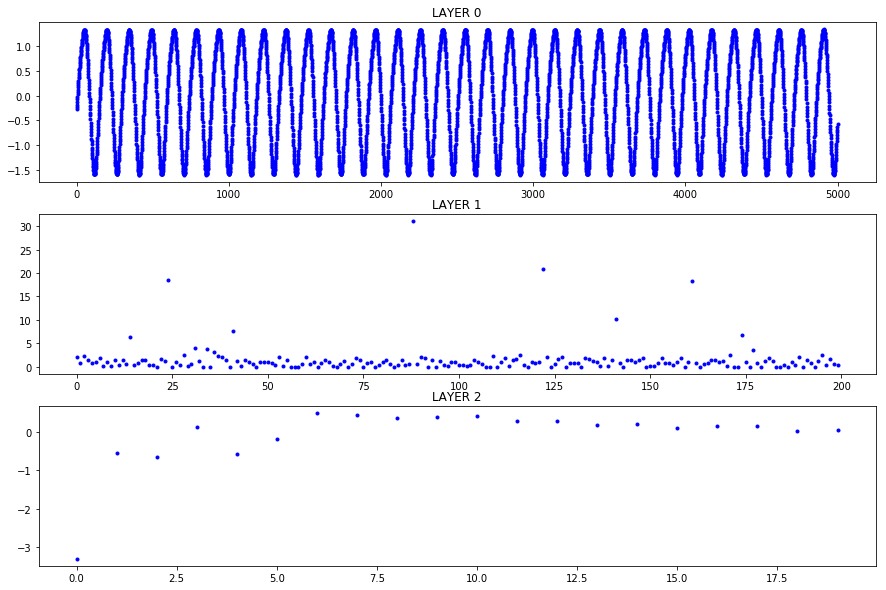

In [62]:
# Plot LAYER REPRESENTATIONS
FIG4, AXS4 = plt.subplots(3,1)
#FIG3, AXS3 = plt.subplots(4,1)

for i in np.arange(3):
#for i in np.arange(4):
    #AXS4[i].plot(output_start[i],'r.')
    AXS4[i].plot(output_end[i],'b.')
    AXS4[i].set_title('LAYER ' + repr(i))

FIG4.set_size_inches(15,10)
plt.show()